# Movie Comparing Project
Welcome to this project!

The purpose of this project was to process scripts for different movies to be able to compare them based on a set of different metrics. I've writen this Jupyter Notebook file in a tutorial style format so please feel free to follow along to see how to impelement similar NLP pipelines in your own projects in the future :D. 

Movie scripts used in this code are are aquired from [Fandom.com](https://www.fandom.com/)

In [15]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib as plt

In [16]:
# Requesting the scripts
movie_names = ['Toy Story', 'Toy Story 2', 'Toy Story 3', 'Toy Story 4']
movie_list = ['Toy_Story', 'Toy_Story_2', 'Toy_Story_3', 'Toy_Story_4']
movie_length = [81, 95, 103, 100] # In minutes

soups = []
for movie in movie_list:
    url = 'https://movies.fandom.com/wiki/' + movie + '/Transcript'
    result = requests.get(url).text
    soups.append(BeautifulSoup(result, "html.parser"))

In [17]:
# First cleaning round 
def cleaning_round_1(soup):
    # Removing the unwanted tags from the soup
    classes = ['toclevel-1 tocsection-1']
    tags = ['h2', 'h3', 'b']
    for class_ in classes:
        for T_of_C in soup.find_all(class_=class_):
            T_of_C.extract()

    for tag in tags:
        for removeable in soup.find_all(tag):
            removeable.extract()

    # Cleaning up the soup for punctuations and removing action brackets from the script
    script = soup.find(class_='mw-parser-output').text
    script = re.sub("[\(\[].*?[\)\]]", "", script)
    script = re.sub('\n\n', " ", script)
    script = re.sub('\n', " ", script)
    script = re.sub('\'', "", script)
    script = re.sub(': ', "", script)
    script = re.sub(' +', ' ', script) 
    return script

scripts_clean_round_1 = list(map(cleaning_round_1, soups))

df_scripts = pd.DataFrame(scripts_clean_round_1, index=movie_list, columns=['Script'])
df_scripts['Movie Name'] = movie_names

In [18]:
# Checking if everything is properly loaded
df_scripts

,Script,Movie Name
Toy_Story,"Alright, everyone! This is a stick-up! Dont a...",Toy Story
Toy_Story_2,ZOO-OO-OOM! Buzz Lightyear Mission log. All s...,Toy Story 2
Toy_Story_3,"Money, money, money. Bart is the name. Call m...",Toy Story 3
Toy_Story_4,Whoa! Its raining cats and dogs out there! I ...,Toy Story 4


In [19]:
# Validating if each script is correct 
df_scripts['Script']['Toy_Story']

' Alright, everyone! This is a stick-up! Dont anybody move! Now empty that safe! Money, money, money! Stop it. Stop it, you mean old potato. Quiet, Bo Peep! Or your sheep get run over! Help! Baa! Help us! Oh, no! Not my sheep! Somebody do something! Reach for the sky. Oh, no. Sheriff Woody. Im here to stop you, One-Eye Bart. Doh! How did you know it was me? Are you gonna come quietly? You cant touch me, sheriff. Ive brought my attack dog, with a built in forcefield! Well, I brought my dinosaur who eats forcefield dogs! Youre going to jail, Bart. Say goodbye to the wife and tatertots. You saved the day again, Woody. Youre my favorite deputy. Come on, lets round up the cattle. Round them up, Cowboy. Hey, cowboy. Come on, Woody. Whoa! Score! Wow! Cool! What do you think? Oh, this looks great, Mom! Okay, birthday boy. We saw it at the store, I asked you for it! One, two- Four. Yeah, I think thats gonna be enough. Can we leave this up until we move? Sure, we can leave it. Yeah. Now go get M

In [22]:
 # We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_scripts.Script)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df_scripts.index
data_dtm

c:\Users\jason\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,12,1225,15,16,17,19,1967,1995,20,...,yoyo,yuk,yup,zealots,zero,zip,zone,zoo,zurg,zurgs
Toy_Story,1,4,0,0,1,0,0,0,0,0,...,0,3,0,1,0,0,2,0,3,0
Toy_Story_2,0,0,0,1,1,0,2,1,1,0,...,1,0,0,0,1,0,2,1,11,4
Toy_Story_3,1,0,2,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,4,0
Toy_Story_4,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Using the Document Term Matrix above we can do some basic investigation into seeing how often each character is mentioned in each movie.

So lets do a mini investigation to see how often some main characters are mentioned in each movie. 

In [23]:
char_appear_dict = {'woody':[], 'lightyear':[], 'bo':[], 'jessie':[], 'gabby':[], 'forky':[], 'lotso':[]}

for key in char_appear_dict:
    # Getting the list of how often a character appears for each movie
    apperance_list = data_dtm.loc[:,key].tolist()
    # Save it into the dictionary
    char_appear_dict[key] = apperance_list
    
df_char_appear = pd.DataFrame.from_dict(char_appear_dict, orient ='index')
df_char_appear.columns = movie_names
df_char_appear

,Toy Story,Toy Story 2,Toy Story 3,Toy Story 4
woody,67,90,53,77
lightyear,28,19,13,5
bo,4,2,2,63
jessie,0,19,8,9
gabby,0,0,0,27
forky,0,0,0,63
lotso,0,0,32,0


In [30]:
df_testing = df_char_appear.filter(items=['Toy Story'])
df_testing

,Toy Story
woody,67
lightyear,28
bo,4
jessie,0
gabby,0
forky,0
lotso,0


In [26]:
char_names_axis = list(char_appear_dict.keys())
# char_names_axis = list(map(lambda x: x.capitalize(), char_names))

<AxesSubplot: >

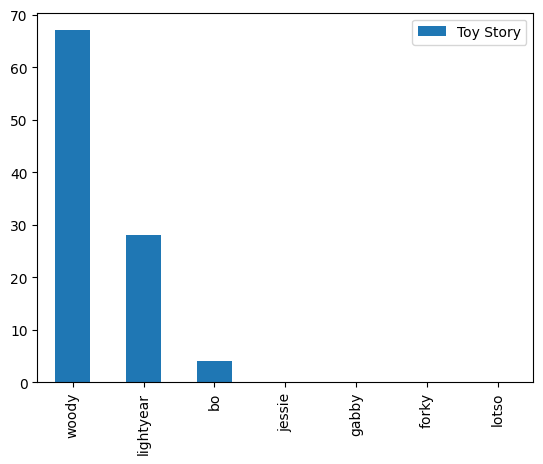

In [32]:

df_testing.plot(kind="bar")